## Test with your video name uploaded from relevant drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
cd '/content/drive/My Drive/CSCE_689/'

/content/drive/My Drive/CSCE_689


In [0]:
g=1 ## Change this everytime else it will overwrite your original plots and json files
video_name='Test_1.avi' ## Input your video name

## Load Test Video

In [593]:
!pip install mlxtend
import mlxtend
from mlxtend.image import extract_face_landmarks

In [0]:
def eye_aspect_ratio(eye):
	
	A = distance.euclidean(eye[1], eye[5])
	B = distance.euclidean(eye[2], eye[4])
	C = distance.euclidean(eye[0], eye[3])
	ear = (A + B) / (2.0 * C)
	return ear

In [0]:
def mouth_aspect_ratio(mouth):
    A = distance.euclidean(mouth[14], mouth[18])
    C = distance.euclidean(mouth[12], mouth[16])
    mar = (A ) / (C)
    return mar

In [0]:
def circularity(eye):
    A = distance.euclidean(eye[1], eye[4])
    radius  = A/2.0
    Area = math.pi * (radius ** 2)
    p = 0
    p += distance.euclidean(eye[0], eye[1])
    p += distance.euclidean(eye[1], eye[2])
    p += distance.euclidean(eye[2], eye[3])
    p += distance.euclidean(eye[3], eye[4])
    p += distance.euclidean(eye[4], eye[5])
    p += distance.euclidean(eye[5], eye[0])
    return 4 * math.pi * Area /(p**2)

In [0]:
def mouth_over_eye(eye):
    ear = eye_aspect_ratio(eye)
    mar = mouth_aspect_ratio(eye)
    mouth_eye = mar/ear
    return mouth_eye

In [0]:
def jaw_dist(jaw,nose):
  list= np.array([distance.euclidean(d, nose) for d in jaw])
  return list.max()/list.mean()



In [0]:
def getFrame(sec):
    start = 0
    vidcap.set(cv2.CAP_PROP_POS_MSEC, start + sec*1000)
    hasFrames,image = vidcap.read()
    return hasFrames, image

In [0]:
def get_landmarks(vidcap):
  sec = 0
  frameRate = 0.5
  success, image = getFrame(sec)
  count = 0
  data=[]
  # labels=[]
  timestamp=[]
#     print('Count: '+str(count))
  while success and count < int(vidcap.get(cv2.CAP_PROP_POS_FRAMES)):
      landmarks = extract_face_landmarks(image)
      try:
          sum(sum(landmarks))
          if sum(sum(landmarks)) != 0:
              count += 1
              data.append(landmarks)
              # labels.append([i])
              # cv2.imwrite("frame%d.jpg" % count, image)
              timestamp.append(sec)
              sec = sec + frameRate
              sec = round(sec, 3)
              success, image = getFrame(sec)

              # print('success: '+ str(success)+str(int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))))
          else:
              sec = sec + frameRate
              sec = round(sec, 3)
              success, image = getFrame(sec)
              print('Face not detected')
      except:
          # print('success: '+ str(success)+str(int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))))
          count=int(vidcap.get(cv2.CAP_PROP_POS_FRAMES))
          pass
      # print(count)
  return data,timestamp

In [601]:
from scipy.spatial import distance
import cv2
data = []
labels = []
frmes=[]
timestamp=[]
vidcap = cv2.VideoCapture(video_name)
data=get_landmarks(vidcap)[0]
timestamp=get_landmarks(vidcap)[1]


/usr/local/lib/python3.6/dist-packages/mlxtend/image/extract_face_landmarks.py:61: UserWarning: No face detected.
  warnings.warn('No face detected.')


Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected


In [0]:
import numpy as np
import math
data = np.array(data)
features = []
main_list=[]
jaw_list=[]
for d in data:
    eye = d[36:68]
    nose=d[28]
    jaw=d[5:13]
    main_list.append(eye)
    ear = eye_aspect_ratio(eye)
    mar = mouth_aspect_ratio(eye)
    cir = circularity(eye)
    movt = jaw_dist(jaw,nose)
    mouth_eye = mouth_over_eye(eye)
    features.append([ear, mar, cir, mouth_eye,movt])

In [0]:
import pandas as pd
df_features=pd.DataFrame(features)

In [0]:
##Normalizing the input features
df_normalised=df_features.apply(lambda x: (x[0:5]-df_features.mean())/df_features.std(),axis=1)


In [0]:
## Merging to create a new dataframe
df=pd.merge(df_normalised,df_features,left_index=True,right_index=True)


In [0]:
try:
  inp=df.to_numpy().reshape(int(df.shape[0]/2),2,10)
except:
  inp=df[:-1].to_numpy().reshape(int(df.shape[0]/2),2,10)
  timestamp=timestamp[:-1]

## Load Model

In [607]:
!pip install keras_self_attention

In [608]:
from keras.models import model_from_json
from keras_self_attention import SeqSelfAttention
# load json and create model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


## Evaluate

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [0]:

pred_rnn = loaded_model.predict_classes(inp)
y_score_10 = loaded_model.predict_proba(inp)

In [0]:
pred=np.array([pred_rnn[i//2] for i in range(len(pred_rnn)*2)])

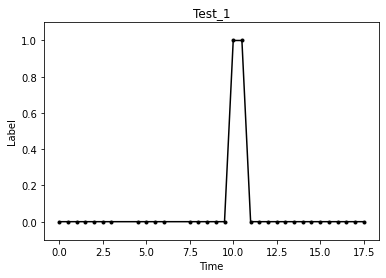

In [612]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(timestamp,pred,marker = '.', color = "Black")
plt.xlabel("Time")
plt.ylim(-0.1,1.1)
plt.ylabel("Label")
plt.title("Test_"+str(g))
plt.show()
fig.savefig("Test" +str(g)+".png")

In [0]:
json_data=pd.DataFrame()
json_data['time']=timestamp
json_data['label']=pred

In [0]:
json_data.to_json("timeLabel_test"+str(g)+".json")